In [3]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
from saveCore_standalone_NFLICS import run_powerBlobs as run_powerBlobsN, powerBlob_utils as utilsN, util as waveletN
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [283]:
idate = '20200530'
time = -24
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_wavelet_BT_'+idate+'_*.nc'
origfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_108_BT_'+idate+'_*.nc'

In [284]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [285]:
data

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667, time: 95)
Coordinates:
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * time     (time) datetime64[ns] 2020-05-30 ... 2020-05-30T23:45:00
Data variables:
    power    (time, lat, lon) float64 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    BT       (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [286]:
tstep_old = data.isel(time=time).load() #-24

In [287]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667)
Coordinates:
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
    time     datetime64[ns] 2020-05-30T18:00:00
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 -3380 -2768 -2162 -1794 ... -1646 -1246 -564 442
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

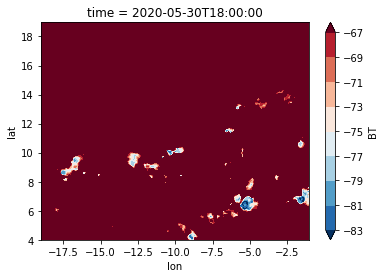

In [288]:
(tstep_old['BT']/100).plot.contourf(levels=np.arange(-83,-65,2))

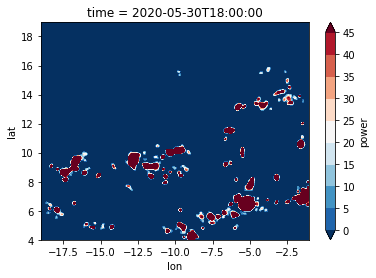

In [289]:
tstep_old['power'].plot.contourf(levels=np.arange(0,50,5))

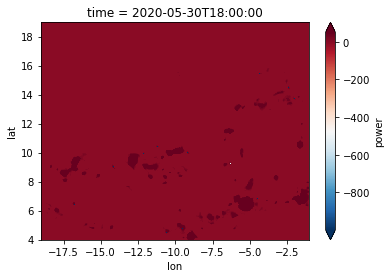

In [290]:
tstep_old['power'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

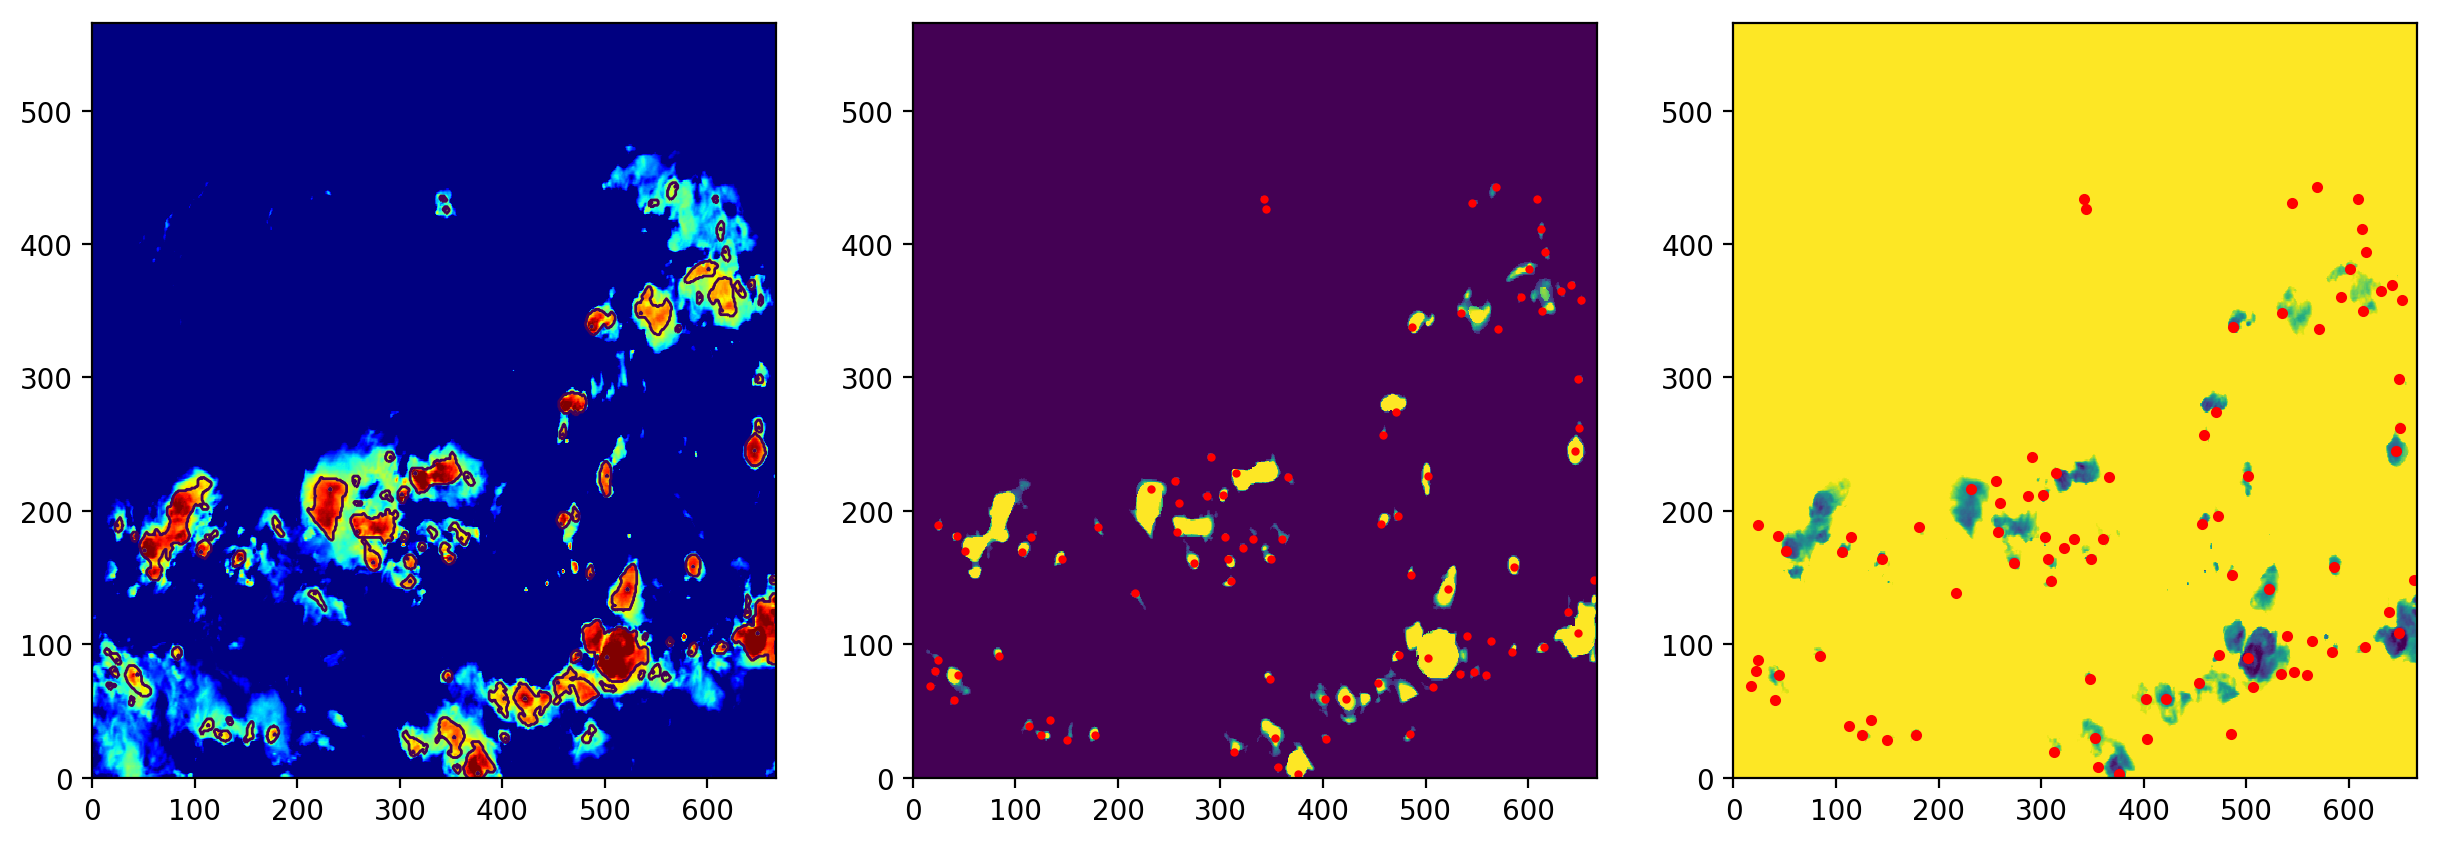

In [291]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['BT']/100, vmin=-80, vmax=-40, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[-5,0], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['BT']/100, vmax=-65, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

#f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [292]:
#tstep_old = xr.open_mfdataset(origfile, decode_times=False)
meteosat_data = tstep_old['BT'].values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time


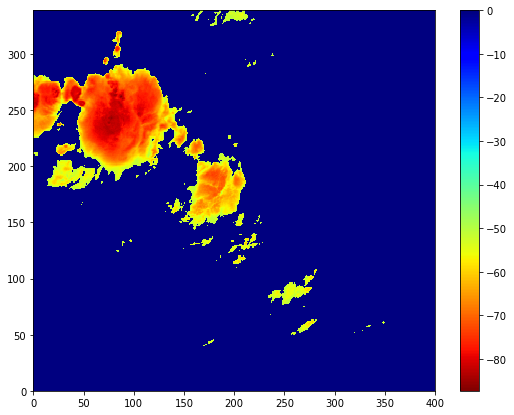

In [293]:
plt.figure(figsize=(9,7))
plt.pcolormesh(outt, cmap='jet_r')
plt.colorbar()

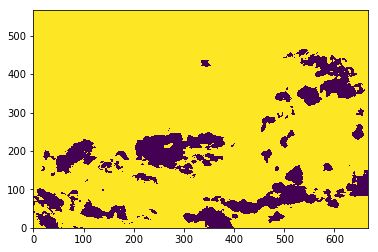

In [294]:
plt.pcolormesh(nogood)

In [295]:
from utils import u_grid, u_interpolate as u_int
import glob

met_folder = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/05/30/'

files = glob.glob(met_folder + 'IR_108_BT_20200530_1800.nc')

ds = xr.open_dataset(files[0], decode_times=False)


In [296]:
files

['/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/05/30/IR_108_BT_20200530_1800.nc']

In [297]:
#ds = ds.isel(time=time).load() #-24

data_resolution = 5 # in km
# make salem grid
grid = u_grid.make(np.arange(-19,0), np.arange(4,20), data_resolution*1000)
dlon = ds['lon_2d'].squeeze().values.T
dlat = ds['lat_2d'].squeeze().values.T
inds, weights, shape = u_int.interpolation_weights_grid(dlon, dlat, grid)

data = ds['IR108_BT'].squeeze().values.T
try:
    outt = u_int.interpolate_data(data, inds, weights, shape)
except IndexError:
    print('Interpolation problem, continue')
lonN, latN = grid.ll_coordinates

In [298]:
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'
nflics = run_powerBlobsN.wavelet_analysis(outt, lonN, latN, date, savefile, data_resolution=5)

outmin -90.20805339186738 34.928253173828125
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


In [299]:
nflics

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400)
Coordinates:
    time     datetime64[ns] 2020-05-30T18:00:00
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
Data variables:
    blobs    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tir      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    radii:              [2 3 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

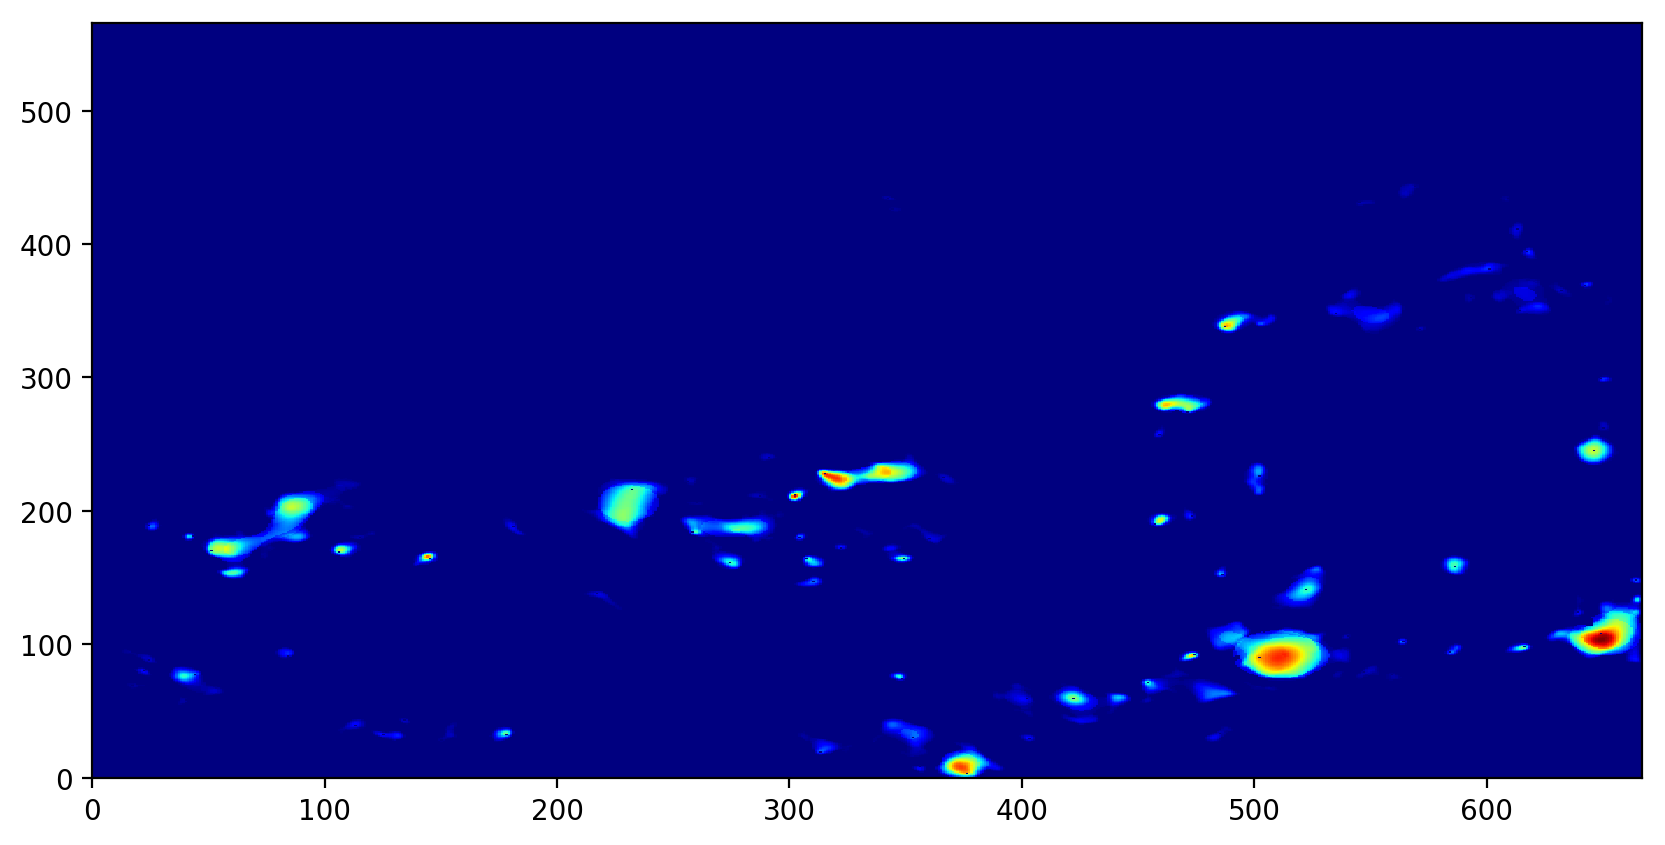

In [300]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(tstep_old['power'], vmin=0, cmap='jet')

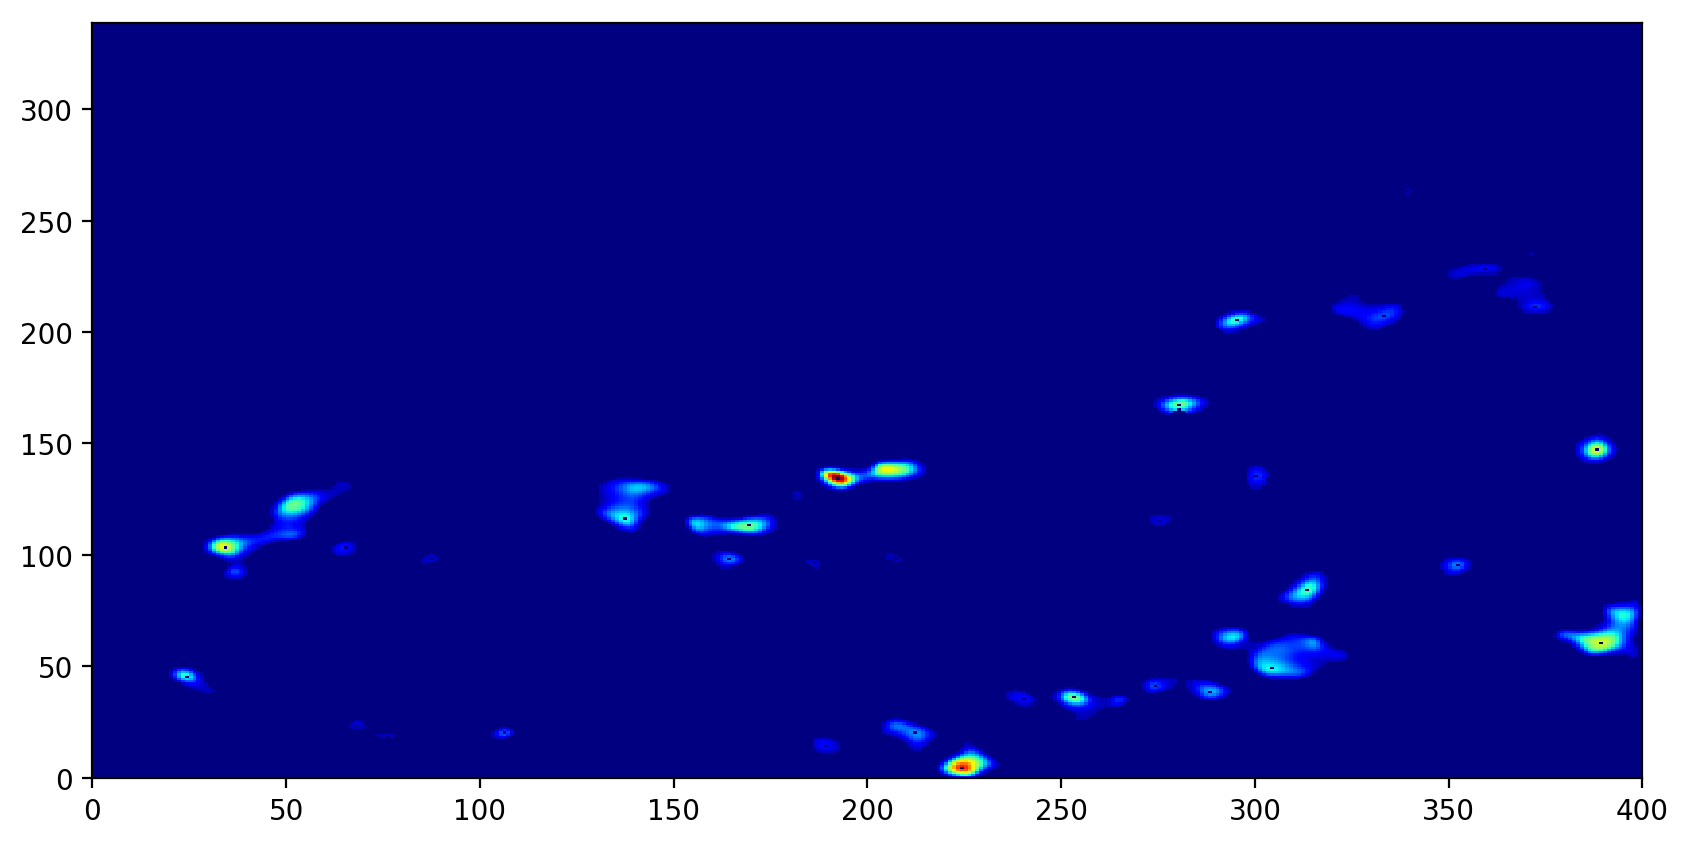

In [301]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(nflics['blobs'], vmin=0, cmap='jet')

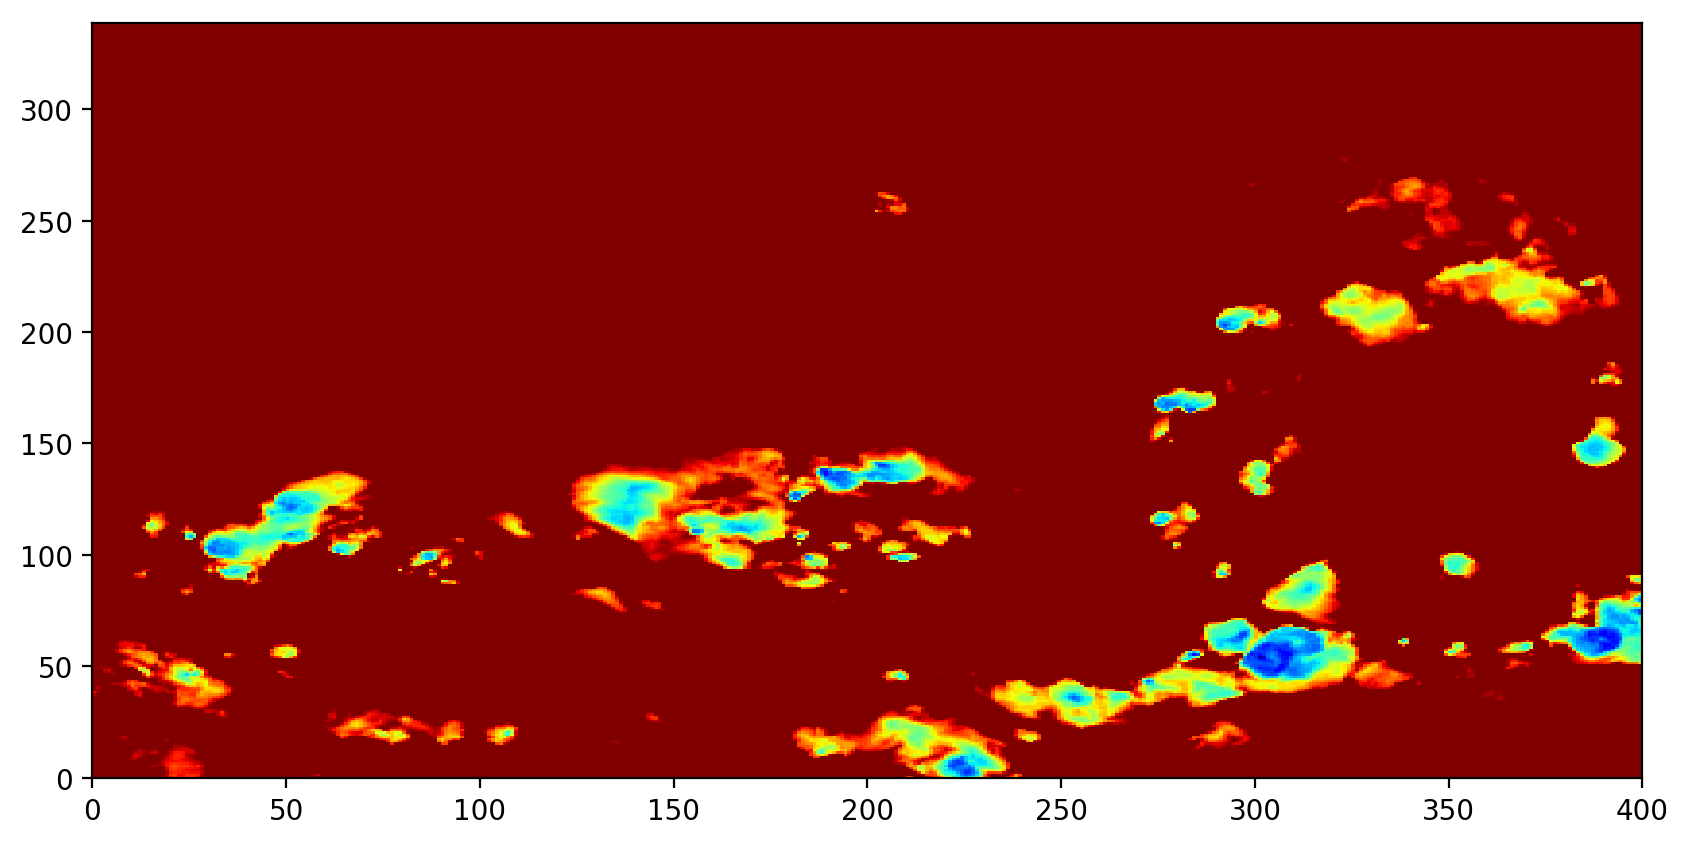

In [302]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(outt, vmax=-55, cmap='jet')

In [303]:
#nflics = nflics.sel(lon=slice(-18,-8), lat=slice(10,19))
nflics = nflics.sel(lon=slice(-18,0), lat=slice(4,12.5))#.sel(lon=slice(-18,0), lat=slice(4,12.5))

In [304]:
tstep_old = tstep_old.sel(lon=slice(-18,0), lat=slice(4,12.5))#.sel(lon=slice(-18,0), lat=slice(4,12.5))

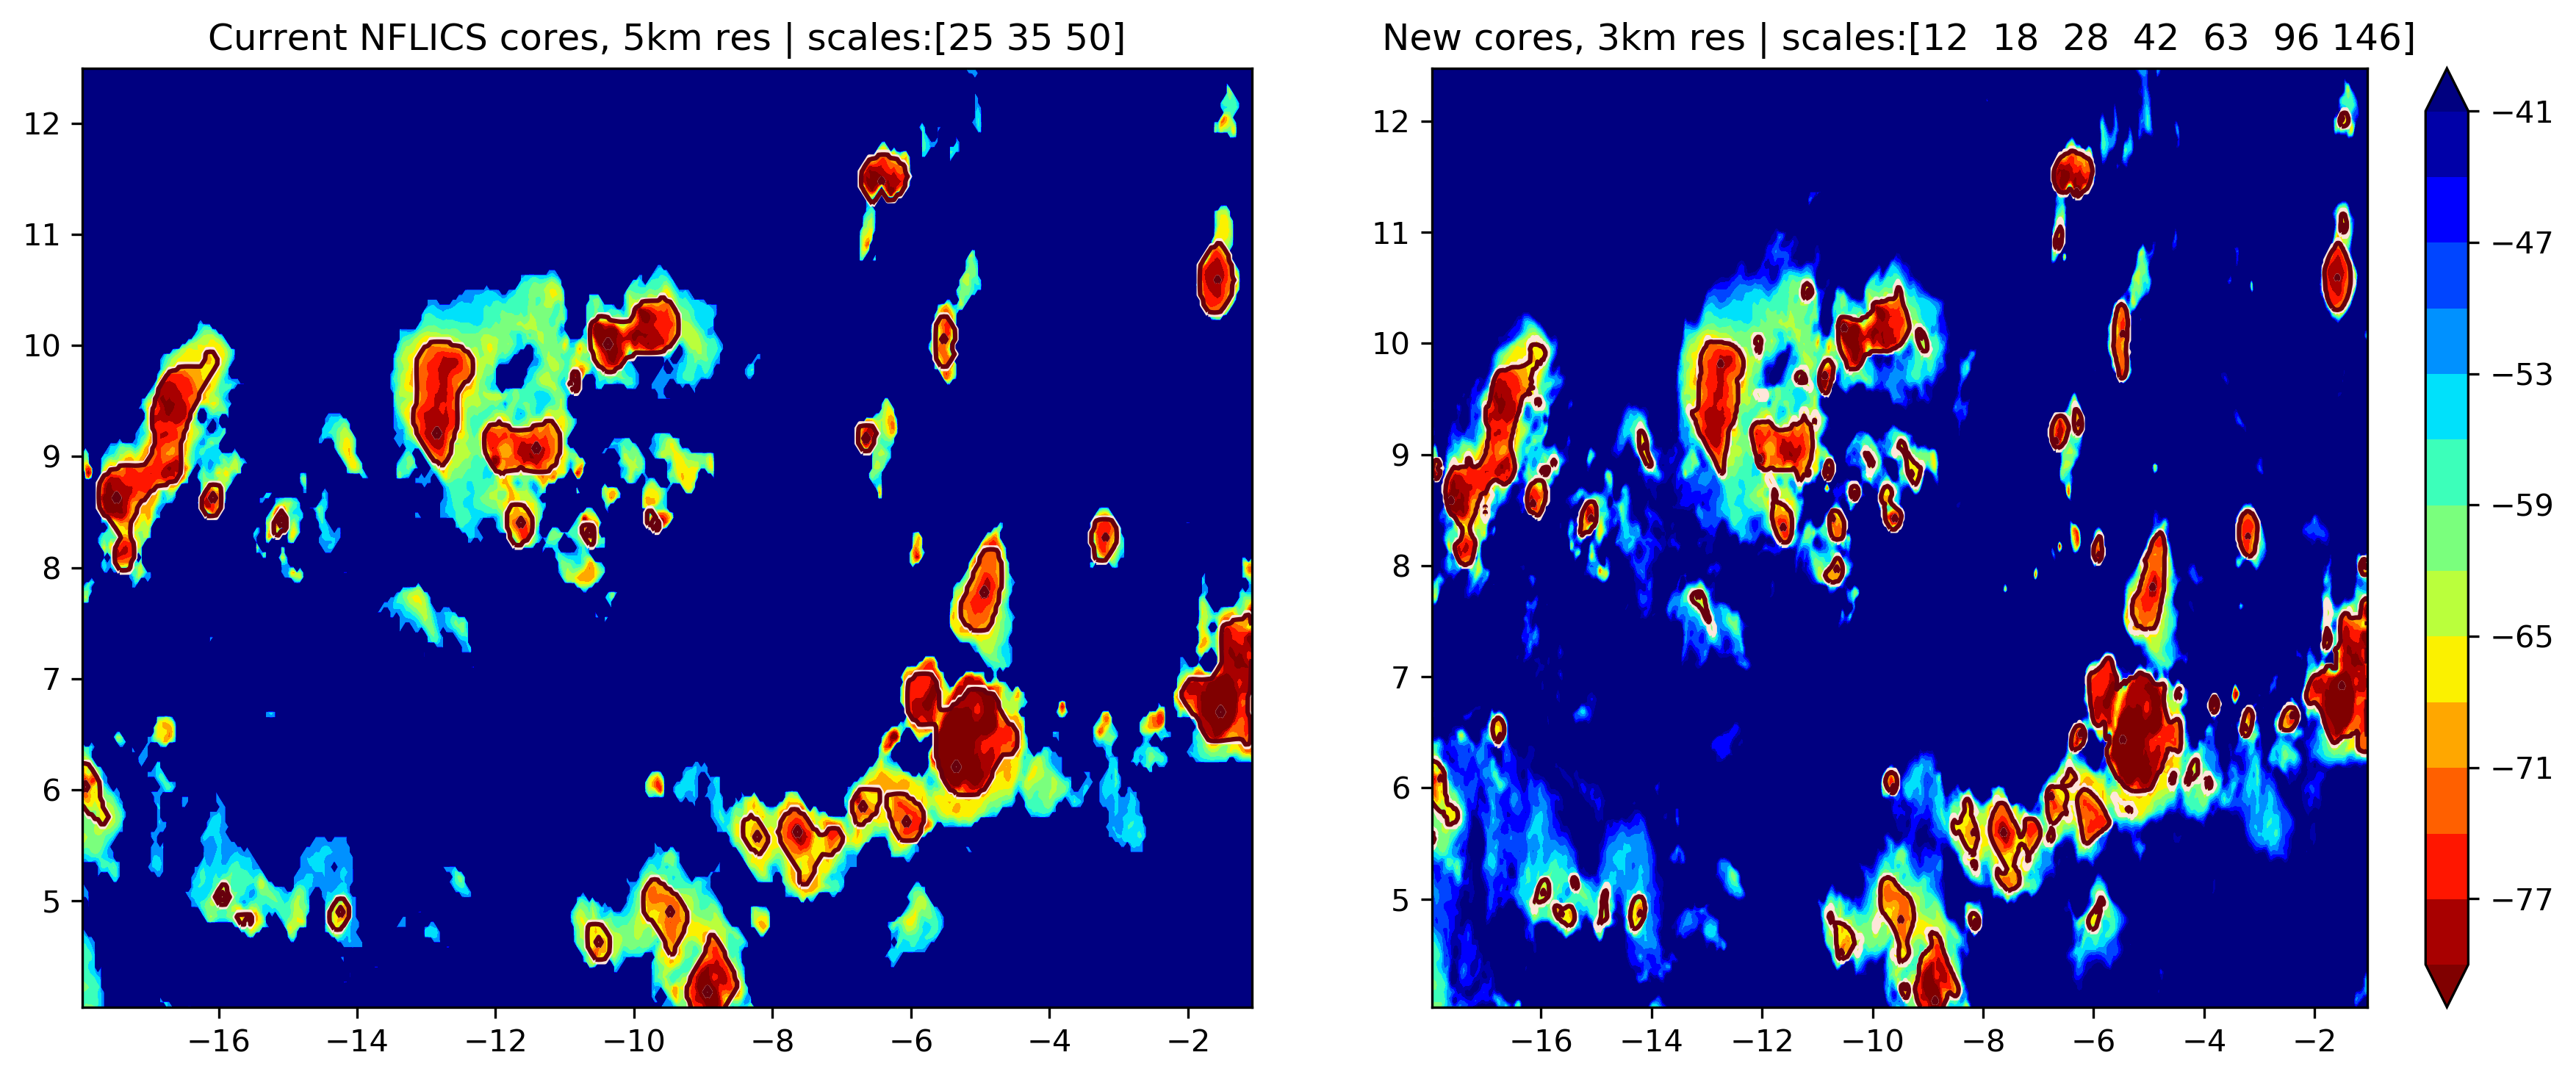

In [314]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(nflics['lon'],nflics['lat'],nflics['tir']/100, levels=np.arange(-80,-40,3), extend='both', cmap='jet_r')
plt.contour(nflics['lon'],nflics['lat'], nflics['blobs'], cmap='Reds', levels=[-1, 0, 10])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(tstep_old['lon'],tstep_old['lat'],tstep_old['BT']/100, levels=np.arange(-80,-40,3), extend='both', cmap='jet_r')
plt.colorbar()
plt.contour(tstep_old['lon'],tstep_old['lat'], tstep_old['power'], cmap='Reds', levels=[-1, 0, 10])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_20090530.jpg')

In [310]:
prcp = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/GPM_granules/3B-HHR.MS.MRG.3IMERG.20200530-S180000-E182959.1080.V06B.HDF5', group='/Grid/')
prcp = prcp['precipitationCal'].squeeze()
pbox = prcp.sel(lat=slice(np.min(latitudes), np.max(latitudes)), lon=slice(np.min(longitudes),np.max(longitudes)))
pbox = pbox.sel(lon=slice(-18,0), lat=slice(4,12.5))
#plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20,30])

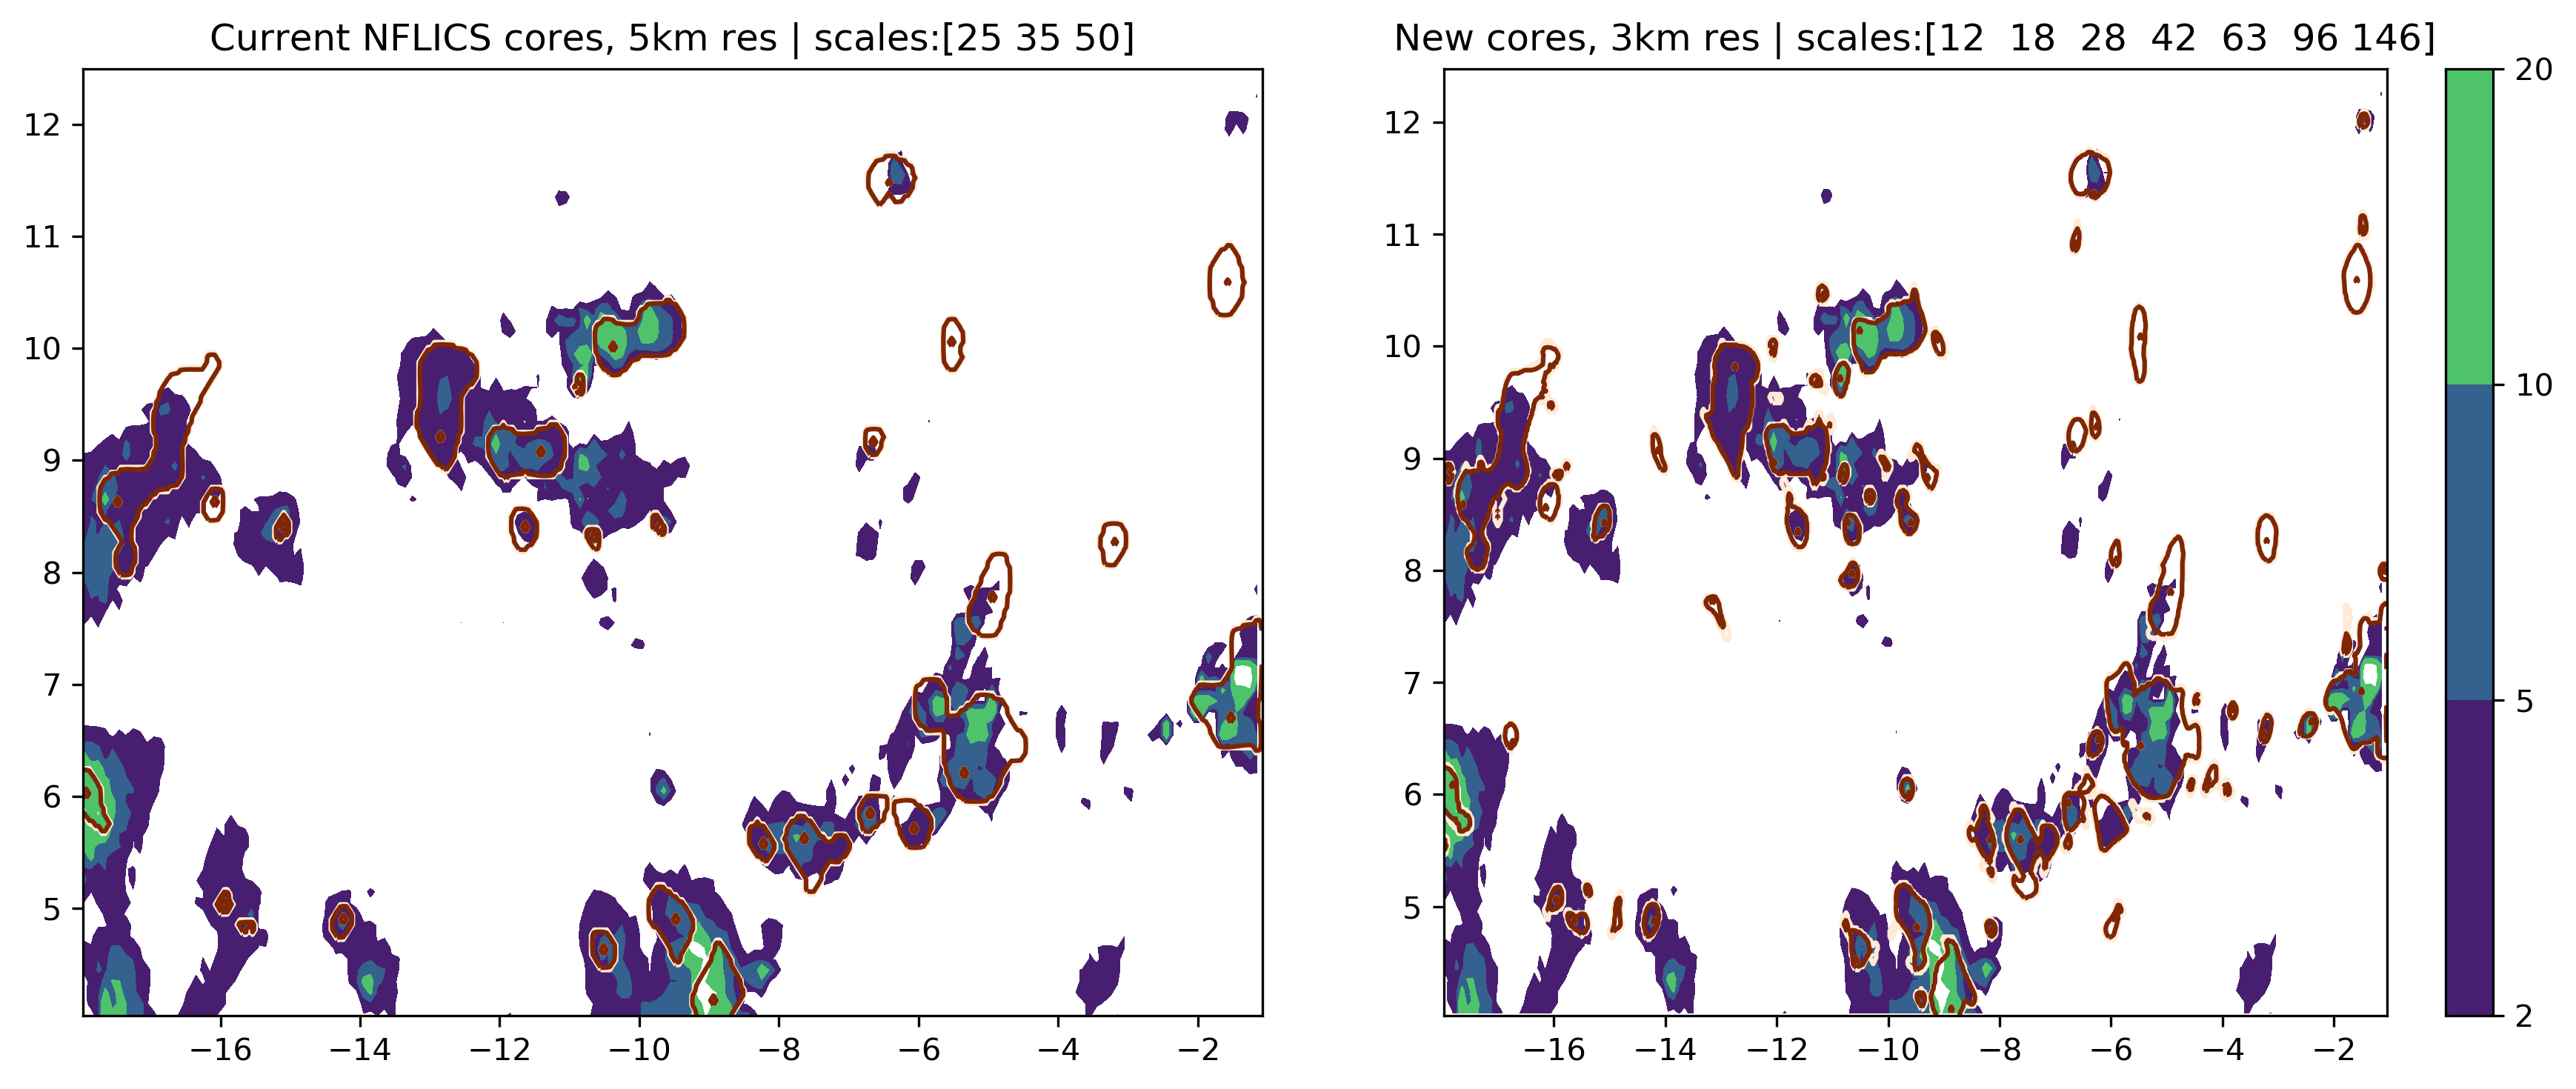

In [313]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20])
plt.contour(nflics['lon'],nflics['lat'], nflics['blobs'], cmap='Oranges', levels=[-1, 0, 10])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20])
plt.colorbar()
plt.contour(tstep_old['lon'],tstep_old['lat'], tstep_old['power'], cmap='Oranges', levels=[-1, 0, 10])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_200530_1800.jpg')

Text(0.5,1,'New cores, 3km res | scales:[12  18  28  42  63  96 146]')

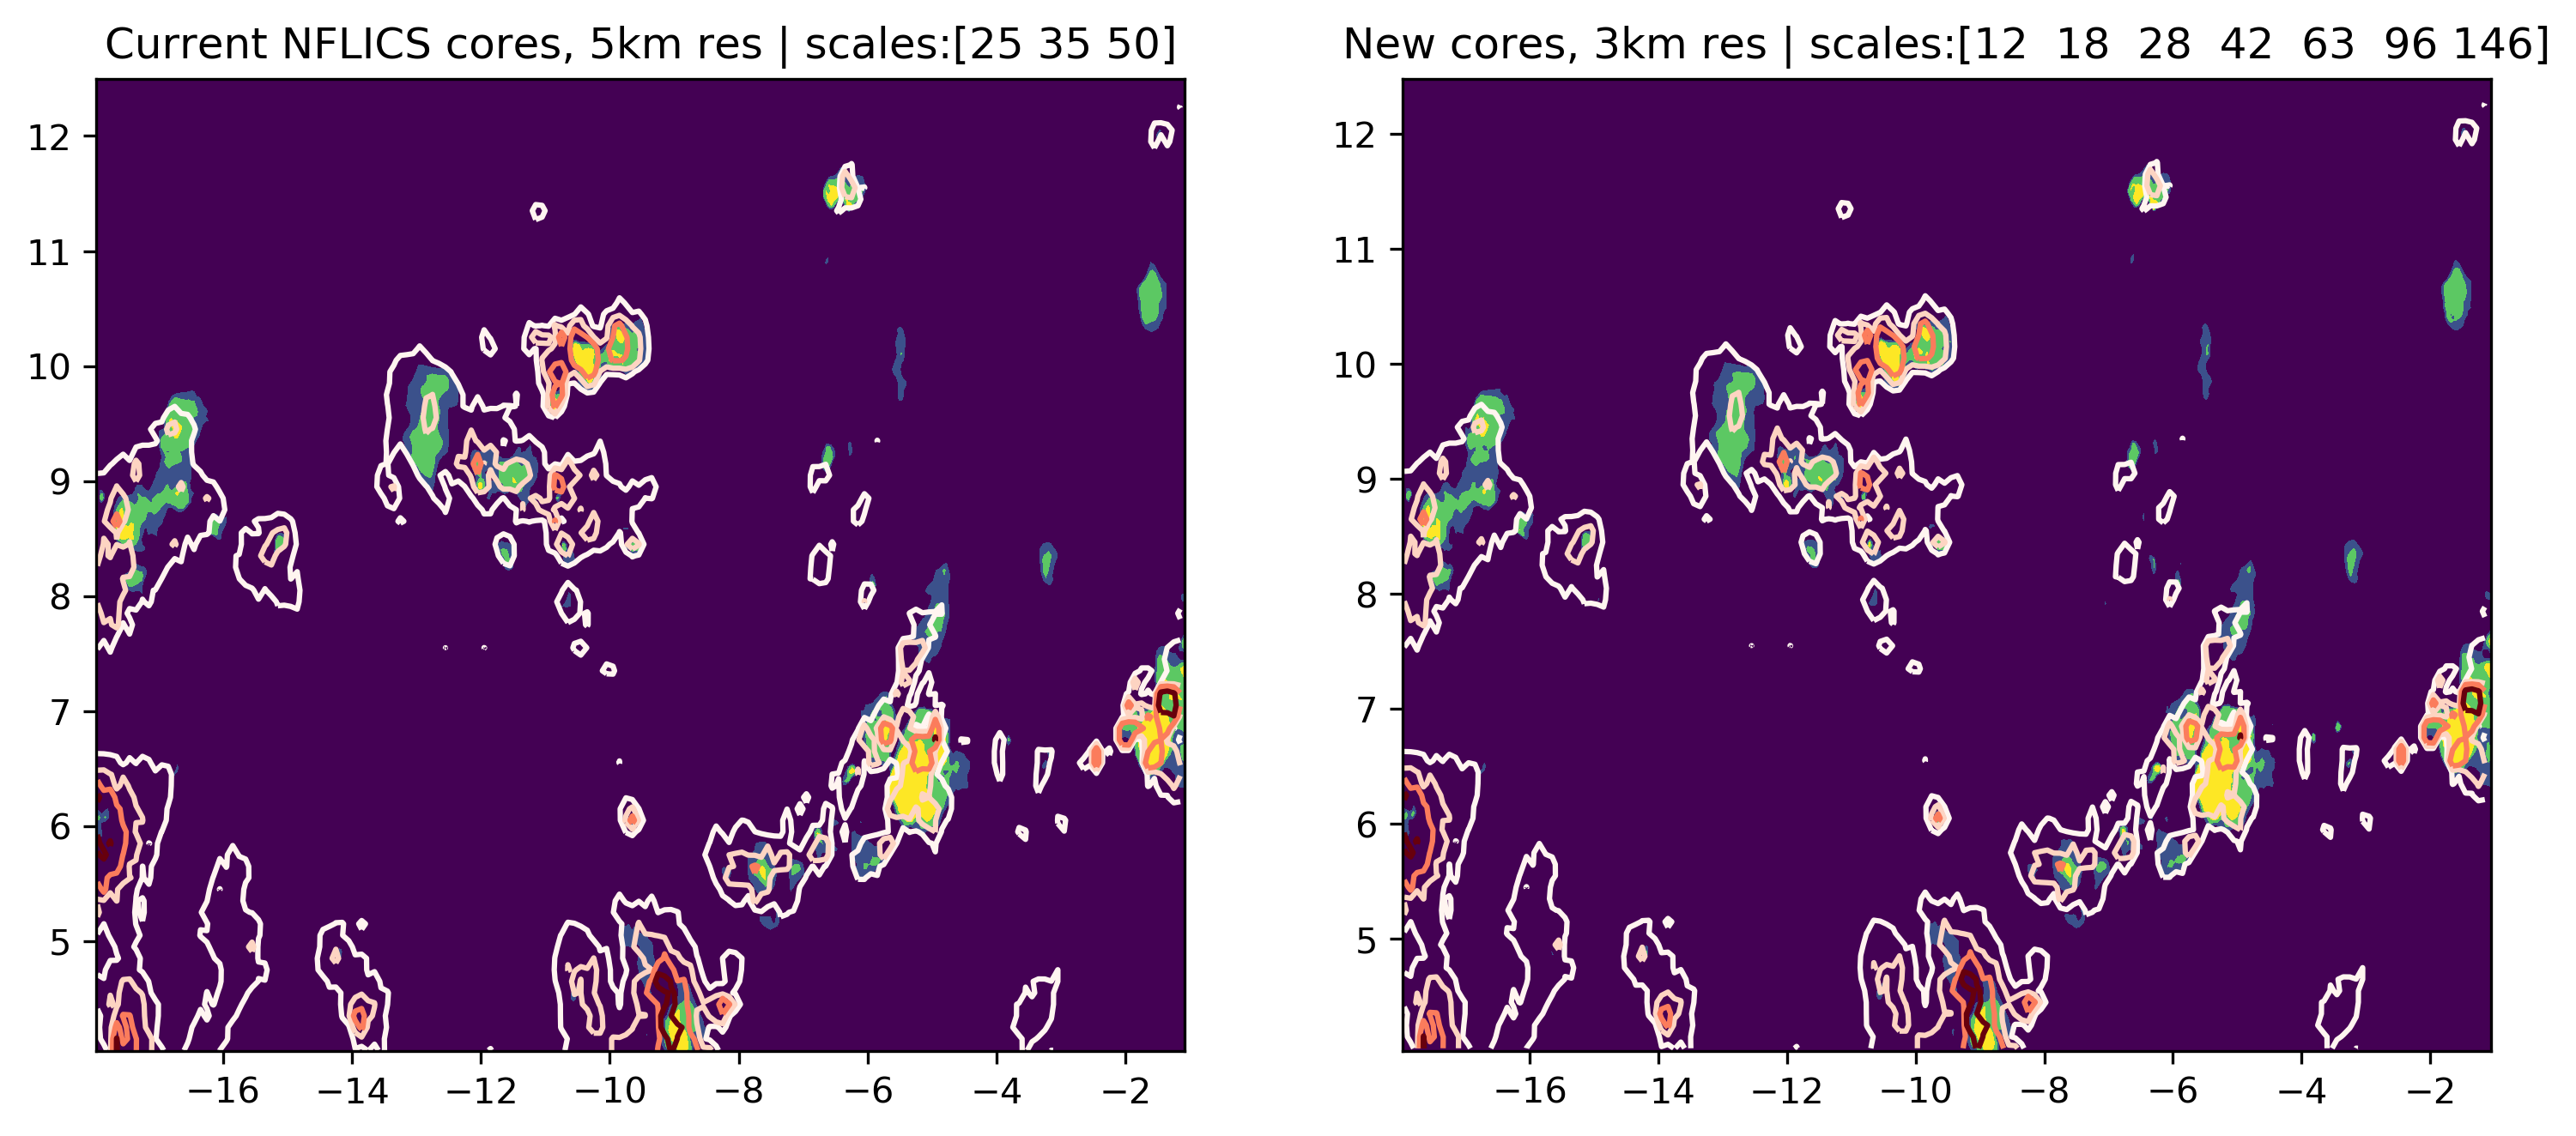

In [308]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(nflics['lon'],nflics['lat'],nflics['tir']/100, levels=np.arange(-80,-65,5), extend='both', cmap='viridis_r')
plt.contour(pbox.lon, pbox.lat,pbox.T, cmap='Reds', levels=[2,5,10,20])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(tstep_old['lon'],tstep_old['lat'],tstep_old['BT']/100, levels=np.arange(-80,-65,5), extend='both', cmap='viridis_r')
plt.contour(pbox.lon, pbox.lat,pbox.T, cmap='Reds', levels=[2,5,10,20])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_200906.jpg')